In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [521]:
df12 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_H/NaSTaB12H.csv')
df11 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_H/NaSTaB11H.csv')
df10 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_H/NaSTaB10H.csv')

In [522]:
dfp12 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_P/NaSTaB12P.csv')
dfp11 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_P/NaSTaB11P.csv')
dfp10 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_P/NaSTaB10P.csv')

## Data Cleaning

In [523]:
# Household data
df12 = df12.rename(columns={'hid12':'hid'})
df11 = df11.rename(columns={'hid11':'hid'})
df10 = df10.rename(columns={'hid10':'hid'})

# Individual data
dfp12 = dfp12.rename(columns={'hid12':'hid'})
dfp11 = dfp11.rename(columns={'hid11':'hid'})
dfp10 = dfp10.rename(columns={'hid10':'hid'})

### Add Feature

In [524]:
# Head of Houshold
def hhinfo(df, year):
    yr = year
    ayr = yr + 2007
    df['female'] = np.NaN
    df['marriage'] = np.NaN
    df['age'] = np.NaN
    df['education'] = np.NaN
    df['unemployed'] = np.NaN
    df['wage-employed'] = np.NaN
    df['self-employed'] = np.NaN
    df['income'] = np.NaN

    var = [f'w{yr}rel0{i}' for i in range(1,10)]

    for n in range(df.shape[0]):
        for m,j in enumerate(var):
            if df.loc[n,j] == 1:
                # gender: female = 1 / if not = 0
                if df.loc[n,f'w{yr}gen0{m+1}'] == 2:
                    df.loc[n,'female'] = 1
                else:
                    df.loc[n,'female'] = 0
                # marriage: partner = 1 / if not = 0
                if df.loc[n,f'w{yr}mar0{m+1}'] == 1:
                    df.loc[n,'marriage'] = 1
                else:
                    df.loc[n,'marriage'] = 0
                # age = survey year - (birth year + birth month / 12)
                df.loc[n,'age'] = round(ayr - (df.loc[n,f'w{yr}byr0{m+1}']+(df.loc[n,f'w{yr}bmn0{m+1}']/12)),2)
                # education: four-year college = 1 / if not = 0
                if df.loc[n,f'w{yr}edu0{m+1}'] == -9:
                    df.loc[n,'education'] = np.NaN
                elif df.loc[n,f'w{yr}edu0{m+1}'] > 5:
                    df.loc[n,'education'] = 1
                else:
                    df.loc[n,'education'] = 0
                # unemployed: unemployed = 1 / if not = 0
                if df.loc[n,f'w{yr}job0{m+1}'] == -9:
                    df.loc[n,'unemployed'] = np.NaN
                elif df.loc[n,f'w{yr}job0{m+1}'] > 11:
                    df.loc[n,'unemployed'] = 1
                else:
                    df.loc[n,'unemployed'] = 0
                # wage employed: wage employed = 1 / if not =0
                if df.loc[n,f'w{yr}jpo0{m+1}'] == -9:
                    df.loc[n,'wage-employed'] = np.NaN
                elif df.loc[n,f'w{yr}jpo0{m+1}'] < 4:
                    df.loc[n,'wage-employed'] = 1
                else:
                    df.loc[n,'wage-employed'] = 0
                # self-employed
                if df.loc[n,f'w{yr}jpo0{m+1}'] == -9:
                    df.loc[n,'self-employed'] = np.NaN
                elif df.loc[n,f'w{yr}jpo0{m+1}'] > 3:
                    df.loc[n,'self-employed'] = 1
                else:
                    df.loc[n,'self-employed'] = 0
                # income = income equalization = hh income / root(hh member number)
                if df.loc[n,f'h{yr}ca004'] == -9:
                    df.loc[n,'income'] = np.NaN
                else:
                    df.loc[n,'income'] = round(df.loc[n,f'h{yr}ca004'] / np.sqrt(df.loc[n,f'w{yr}fnum']),3)

In [525]:
hhinfo(df10, 10)
hhinfo(df11, 11)
hhinfo(df12, 12)

### Select Feature

In [526]:
# Basic info
info = ['female', 
        'marriage', 
        'age',
        'education',
        'unemployed',
        'wage-employed',
        'self-employed',
        'income']

# Financial assets
fin = ['deposit',
           'fund',
           'bond',
           'stock',
           'insurance',
           'lend',
           'other',
           'mortage',
           'pension']

financial = [f'fa00{i}' for i in range(2,10,2)] + \
      [f'fa0{i}' for i in range(10,20,2)]

# Real-estate
re = ['residence', 
      'house', # house other than residence
      'land',
      'building']
      
realestate = ['fb031','fb010','fb022','fb024']

# # Other assets
# other = ['fb026','fb042','fb020']
# # 귀금속, 자동차, 기타자산

# # Monthly consumption, savings, income
# monthly = [f'ca00{i}' for i in range(1,5)]
# monthlyname = ['income1',
#                'consumption',
#                'saving',
#                'income2']

In [527]:
# Selecting features
vars = []
for n in range(10,13):
    var = ['hid'] + \
          info + \
          [f'h{n}{i}' for i in financial] + \
          [f'h{n}{i}' for i in realestate]
    vars.append(var)

In [528]:
# merge dataframe to long data structure
# 2017
df1 = df10[vars[0]].copy()
df1.columns = ['hid'] + info + fin + re
df1['yearID'] = 2017

# 2018
df2 = df11[vars[1]].copy()
df2.columns = ['hid'] + info + fin + re
df2['yearID'] = 2018

# 2019
df3 = df12[vars[2]].copy()
df3.columns = ['hid'] + info + fin + re
df3['yearID'] = 2019

# Concat
df = pd.concat([df1, df2, df3])
df.insert(1, 'yearID', df.pop('yearID'))
df = df.sort_values(by=['hid','yearID'])

### Outliers

In [529]:
# Questions that the respondent did not answer or don't know are implicated as -9
df[fin+re] = df[fin+re].fillna(0)
df = df.replace(-9, np.NaN)
df = df.dropna()

### Risk Aversion

In [530]:
dfp12 = dfp12[['hid','p12gf001']].groupby('hid').mean().reset_index()
dfp11 = dfp11[['hid','p11gf001']].groupby('hid').mean().reset_index()
dfp10 = dfp10[['hid','p10gf001']].groupby('hid').mean().reset_index()

dfp12['yearID'] = 2019
dfp11['yearID'] = 2018
dfp10['yearID'] = 2017

dfp12.columns = ['hid','risk aversion','yearID']
dfp11.columns = ['hid','risk aversion','yearID']
dfp10.columns = ['hid','risk aversion','yearID']

In [531]:
dfp = pd.concat([dfp10, dfp11, dfp12])
df = df.merge(dfp, how='left', on=['hid','yearID'])

### Customer Price Index (CPI)

2017: 100

2018: 101.476

2019: 101.865

In [532]:
cpi18 = 1.01476
cpi19 = 1.01865

df.loc[df['yearID']==2018, fin+re] = df[df['yearID'] == 2018][fin+re] * cpi18
df.loc[df['yearID']==2019, fin+re] = df[df['yearID'] == 2019][fin+re] * cpi19

### Total Asset

In [533]:
# Total Asset
df['f_total'] = df['deposit'] + df['fund'] + df['bond'] + df['stock'] + df['insurance'] + df['lend'] + df['other'] + df['mortage'] + df['pension']

df['r_total'] = df['residence'] + df['house'] + df['land'] + df['building']

df['total'] = df['f_total'] + df['r_total']

## Descriptive Statistic

In [534]:
# Demographic Info
df[info].describe()

,female,marriage,age,education,unemployed,wage-employed,self-employed,income
count,14210.000000,14210.000000,14210.000000,14210.000000,14210.000000,14210.000000,14210.000000,14210.000000
mean,0.234975,0.719282,56.262157,0.351795,0.225053,0.521253,0.253695,243.327334
std,0.423998,0.449366,14.978255,0.477547,0.417632,0.499566,0.435140,195.960729
min,0.000000,0.000000,19.830000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,45.330000,0.000000,0.000000,0.000000,0.000000,121.798750
50%,0.000000,1.000000,55.250000,0.000000,0.000000,1.000000,0.000000,207.225500
75%,0.000000,1.000000,67.420000,1.000000,0.000000,1.000000,1.000000,315.467500
max,1.000000,1.000000,96.830000,1.000000,1.000000,1.000000,1.000000,4618.802000


In [535]:
# Financial Assets
df[fin].describe()

,deposit,fund,bond,stock,insurance,lend,other,mortage,pension
count,14210.000000,14210.000000,14210.000000,14210.000000,14210.000000,14210.000000,14210.000000,14210.000000,1.421000e+04
mean,3228.268471,137.571663,29.853798,360.971916,302.711353,52.416153,77.623090,18.448375,4.361140e+02
std,6385.048209,2286.839272,786.385034,2998.072022,1625.004627,867.444262,1499.803951,83.993893,1.479311e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,160.590400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1018.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,3247.232000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
max,133646.880000,213916.500000,50000.000000,101865.000000,117720.000000,40746.000000,71033.200000,3667.140000,1.014759e+06


In [536]:
# Real-estate Assets
df[re].describe()

,residence,house,land,building
count,14210.000000,14210.000000,14210.000000,1.421000e+04
mean,17160.260326,4600.448972,3082.279282,2.250477e+03
std,27013.586131,20109.792602,17749.591593,2.172776e+04
min,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000e+00
50%,8500.000000,0.000000,0.000000,0.000000e+00
75%,25000.000000,0.000000,0.000000,0.000000e+00
max,407460.000000,588560.800000,700000.000000,1.300000e+06


In [537]:
# Total Asset
df[['f_total', 'r_total', 'total']].describe()

,f_total,r_total,total
count,1.421000e+04,1.421000e+04,1.421000e+04
mean,4.643979e+03,2.709347e+04,3.173744e+04
std,1.732410e+04,5.069636e+04,5.651307e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.044280e+02,0.000000e+00,2.159538e+03
50%,1.589094e+03,1.420664e+04,1.725092e+04
75%,5.000000e+03,3.247232e+04,3.800000e+04
max,1.040128e+06,2.000000e+06,2.065000e+06


# EDA

In [538]:
eda = df.copy()

In [539]:
# Financial vs Real-estate

# With residence
total_sum1 = eda.groupby('yearID').sum()[['f_total', 'r_total', 'total']]
total_sum1['financial'] = total_sum1['f_total'] / total_sum1['total']
total_sum1['real-estate'] = total_sum1['r_total'] / total_sum1['total']

# Without residence
eda['nor_total'] = eda['house'] + eda['land'] + eda['building']
eda['minus_total'] = df['f_total'] + eda['nor_total']
total_sum2 = eda.groupby('yearID').sum()[['f_total', 'nor_total', 'minus_total']]
total_sum2['financial'] = total_sum2['f_total'] / total_sum2['minus_total']
total_sum2['real-estate'] = total_sum2['nor_total'] / total_sum2['minus_total']


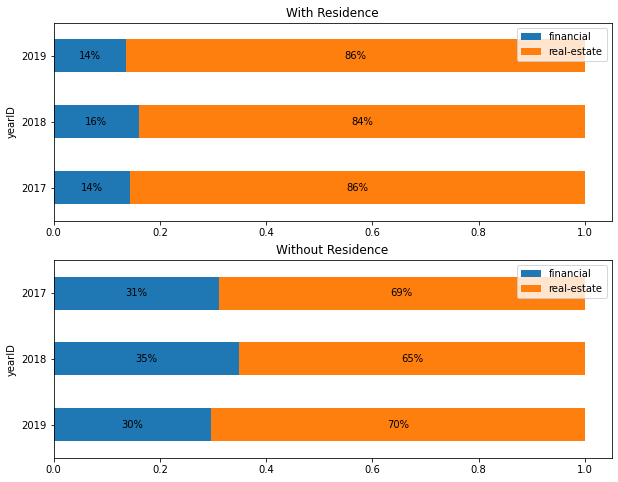

In [540]:
result1 = total_sum1[['financial','real-estate']]
result2 = total_sum2[['financial','real-estate']]

f,ax = plt.subplots(2,1,figsize=(10,8))

ax[0].set_title('With Residence')

ax0 = result1.plot.barh(stacked=True, ax=ax[0])
plt.gca().invert_yaxis()
for n in ax0.patches:
    width, height = n.get_width(), n.get_height()
    x, y = n.get_xy()
    ax0.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width*100),
            horizontalalignment='center',
            verticalalignment='center')


ax[1].set_title('Without Residence')

ax1 = result2.plot.barh(stacked=True, ax=ax[1])
plt.gca().invert_yaxis()
for n in ax1.patches:
    width, height = n.get_width(), n.get_height()
    x, y = n.get_xy()
    ax1.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width*100),
            horizontalalignment='center',
            verticalalignment='center')
plt.show()


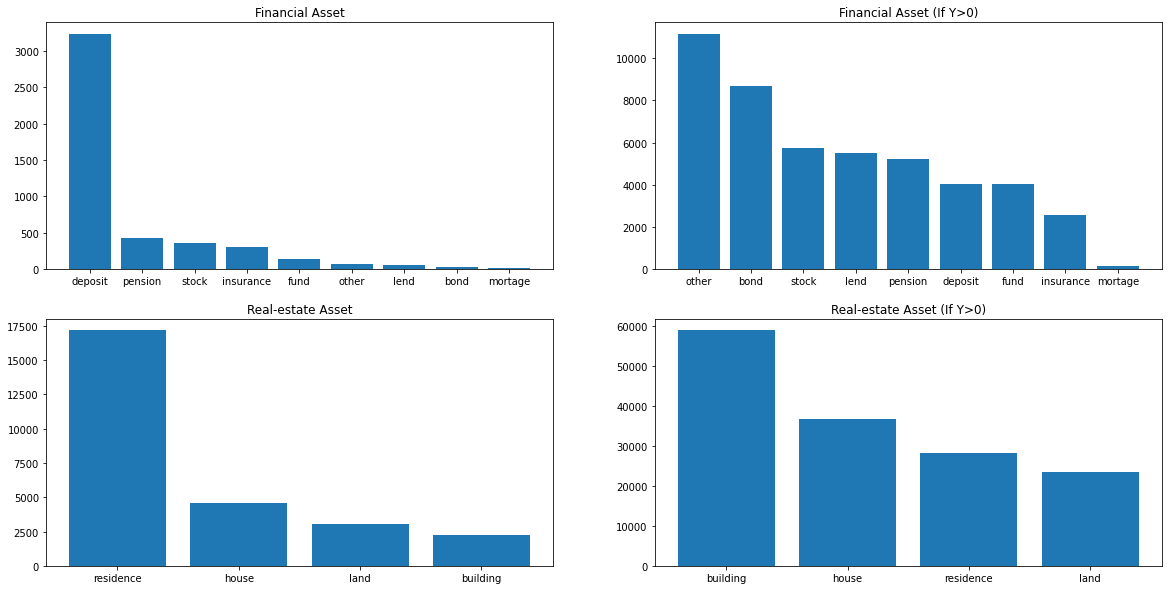

In [541]:
# Asset Proportion
f,ax = plt.subplots(2,2,figsize=(20,10))
result = eda[fin].mean().sort_values(ascending=False)
ax[0,0].bar(result.index, result.values)
ax[0,0].set_title('Financial Asset')

result = eda[fin].replace(0,np.NaN).mean().sort_values(ascending=False)
ax[0,1].bar(result.index, result.values)
ax[0,1].set_title('Financial Asset (If Y>0)')

result = eda[re].mean().sort_values(ascending=False)
ax[1,0].bar(result.index, result.values)
ax[1,0].set_title('Real-estate Asset')

result = eda[re].replace(0,np.NaN).mean().sort_values(ascending=False)
ax[1,1].bar(result.index, result.values)
ax[1,1].set_title('Real-estate Asset (If Y>0)')

plt.show()

In [542]:
# Find percentage of each assets by year
ratio_a = df[['yearID']].copy()
for i in df[finname]:
    ratio_a[i] = df[i] / df['total_a'].copy() * 100

ratio_b = df[['yearID']].copy()
for i in df.loc[:,'fund':'pension']:
    ratio_b[i] = df[i] / df['total_b'].copy() * 100

ratio_a = ratio_a.groupby('yearID').mean()
ratio_b = ratio_b.groupby('yearID').mean()

NameError: name 'finname' is not defined

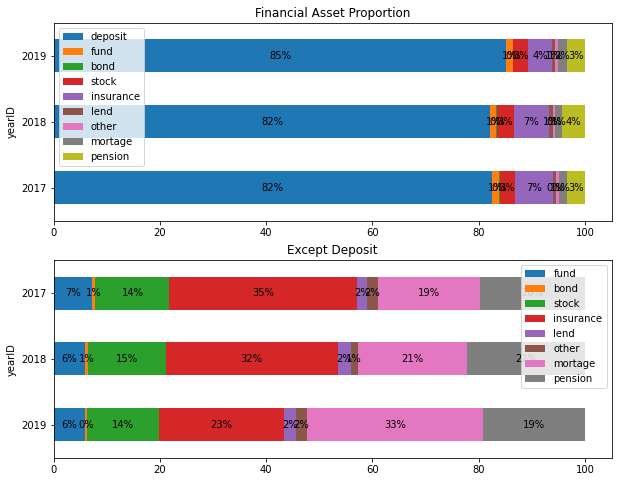

In [ ]:
f,ax = plt.subplots(2,1,figsize=(10,8))
ax[0].set_title('Financial Asset Proportion')
ax[1].set_title('Except Deposit')

# All assets
a = ratio_a.plot.barh(stacked=True, ax=ax[0])
plt.gca().invert_yaxis() # reverse order(top to down)
for n in a.patches:
    width, height = n.get_width(), n.get_height()
    x, y = n.get_xy()
    a.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

# Except deposit asset
b = ratio_b.plot.barh(stacked=True, ax=ax[1])
plt.gca().invert_yaxis() # reverse order(top to down)
for n in b.patches:
    width, height = n.get_width(), n.get_height()
    x, y = n.get_xy()
    b.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()

## Analysis

1. See how Risk Aversion affect asset portfolio (financial vs real-estate)
2. See what specific assets are affected by individual risk aversion rate

In [545]:
df_log = df.copy()
df_log[fin] = np.log2(df_log[fin]+2)
df_log[re] = np.log2(df_log[re]+2)
df_log[['age','income']] = np.log2(df_log[['age','income']]+2)

In [546]:
anal = df[info].copy()
anal['yearID'] = df['yearID'].copy()
anal['y'] = df['f_total'] / df['total']


In [547]:
anal_demean = anal.copy()

anal_demean.groupby('hid').

SyntaxError: invalid syntax (3502941458.py, line 3)

In [550]:
anal

,female,marriage,age,education,unemployed,wage-employed,self-employed,income,yearID,y
0,1.0,1.0,40.83,0.0,0.0,1.0,0.0,258.0,2017,0.000000
1,1.0,1.0,41.83,0.0,0.0,1.0,0.0,287.0,2018,0.009901
2,1.0,1.0,42.83,0.0,0.0,1.0,0.0,283.0,2019,0.012346
3,1.0,0.0,69.25,0.0,0.0,1.0,0.0,140.0,2017,0.588235
4,1.0,0.0,70.25,0.0,0.0,1.0,0.0,208.0,2018,0.002849
...,...,...,...,...,...,...,...,...,...,...
14205,1.0,0.0,77.92,0.0,0.0,1.0,0.0,65.0,2018,0.250000
14206,1.0,0.0,78.92,0.0,0.0,1.0,0.0,50.0,2019,0.000000
14207,0.0,1.0,56.50,0.0,0.0,0.0,1.0,150.0,2017,0.000000
14208,0.0,1.0,57.50,0.0,0.0,0.0,1.0,150.0,2018,0.038462
